In [1]:
#импортируем необходимые модули
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.cross_validation import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve
from sklearn import grid_search

In [2]:
#читаем данные
df = pd.DataFrame.from_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data",
                           header=None, index_col=None, sep=",")

In [3]:
#добавляем названия столбцов
df.columns=["word_freq_make","word_freq_address","word_freq_all","word_freq_3d","word_freq_our","word_freq_over",
            "word_freq_remove","word_freq_internet","word_freq_order","word_freq_mail","word_freq_receive",
            "word_freq_will","word_freq_people","word_freq_report","word_freq_addresses","word_freq_free",
            "word_freq_business","word_freq_email","word_freq_you","word_freq_credit","word_freq_your",
            "word_freq_font","word_freq_000","word_freq_money","word_freq_hp","word_freq_hpl","word_freq_george",
            "word_freq_650","word_freq_lab","word_freq_labs","word_freq_telnet","word_freq_857","word_freq_data",
            "word_freq_415","word_freq_85","word_freq_technology","word_freq_1999","word_freq_parts","word_freq_pm",
            "word_freq_direct","word_freq_cs","word_freq_meeting","word_freq_original","word_freq_project",
            "word_freq_re","word_freq_edu","word_freq_table","word_freq_conference","char_freq_;",
            "char_freq_(","char_freq_[","char_freq_!","char_freq_$","char_freq_#","capital_run_length_average",
            "capital_run_length_longest","capital_run_length_total","spam_or_not"]

In [4]:
#наблюдений - 4601, независимых переменных - 57
df.shape

(4601, 58)

In [5]:
#делим данные на train и test
df_train, df_test = train_test_split(df, train_size=0.75)

In [6]:
predictors = df.columns[:57]

In [7]:
# строим классификатор
gbc = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=50, subsample=0.99, 
                            min_samples_split=50, min_samples_leaf=25, 
                              max_depth=7, init=None, random_state=None, max_features=None,
                              verbose=0, max_leaf_nodes=None, warm_start=False )
gbc.fit(df_train[predictors], df_train['spam_or_not'])

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=7, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=25, min_samples_split=50,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              random_state=None, subsample=0.99, verbose=0,
              warm_start=False)

In [10]:
#считаем оценки качества классификатора
train_prediction = gbc.predict_proba(df_train[predictors])
train_auc_val = roc_auc_score(list(df_train['spam_or_not']), list( train_prediction[:,1]))
print (train_auc_val)
test_prediction = gbc.predict_proba(df_test[predictors])
test_auc_val = roc_auc_score(list(df_test['spam_or_not']), list( test_prediction[:,1]))
print(test_auc_val)

0.996691079258
0.982460873407


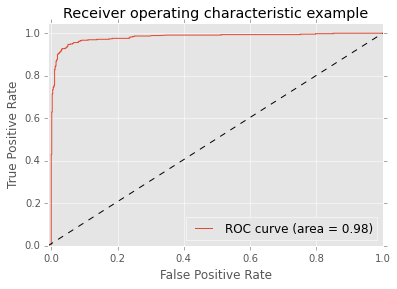

In [34]:
#строим ROC-кривую
fpr, tpr, thresholds = roc_curve(df_test['spam_or_not'], test_prediction[:,1] )
plt.figure()
plt.style.use('ggplot')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % test_auc_val)
plt.plot([-0.01, 1], [0, 1], 'k--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [17]:
#подбор параметров c grid_search
gbc = GradientBoostingClassifier()
parameters = {'loss':['deviance'], 'n_estimators':[ 50, 100], 'min_samples_split' : [50, 100], 
              'min_samples_leaf' : [25, 50], 'max_depth' : [3, 5]}
clf = grid_search.GridSearchCV(gbc, parameters, verbose = False)
clf.fit(df_train[predictors], df_train['spam_or_not'])

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'n_estimators': [50, 100], 'loss': ['deviance'], 'min_samples_split': [50, 100], 'max_depth': [3, 5], 'min_samples_leaf': [25, 50]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=False)

In [18]:
clf.best_params_ 

{'loss': 'deviance',
 'max_depth': 5,
 'min_samples_leaf': 50,
 'min_samples_split': 50,
 'n_estimators': 100}

In [19]:
clf_best = clf.best_estimator_

In [20]:
train_prediction = clf_best.predict_proba(df_train[predictors])
train_auc_val = roc_auc_score(list(df_train['spam_or_not']), list( train_prediction[:,1]))
print (train_auc_val)
test_prediction = clf_best.predict_proba(df_test[predictors])
test_auc_val = roc_auc_score(list(df_test['spam_or_not']), list( test_prediction[:,1]))
print(test_auc_val)

0.996535895259
0.985403951425
